In [15]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

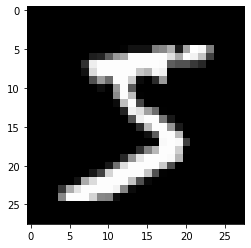

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# Show the first sample
plt.imshow(X[0].reshape(28, 28), cmap='gray')

In [18]:
# Number of training samples
X_train.shape[0]

56000

In [19]:
# Number of testing samples
X_test.shape[0]

14000

In [20]:
from sklearn.neural_network import MLPClassifier

# Design MLP 
mlp1 = MLPClassifier(hidden_layer_sizes=(25,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [21]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    model_rf = mlp1.fit(X_train, y_train)

Iteration 1, loss = 0.35304398
Iteration 2, loss = 0.17923050
Iteration 3, loss = 0.14261831
Iteration 4, loss = 0.12351585
Iteration 5, loss = 0.11027254
Iteration 6, loss = 0.10247761
Iteration 7, loss = 0.09624538
Iteration 8, loss = 0.09001052
Iteration 9, loss = 0.08532994
Iteration 10, loss = 0.08156252


In [22]:
print("25 HIDDEN UNITS")
print(f"training accuracy: {round(mlp1.score(X_train, y_train) * 100, 4)}%") 
print(f"test accuracy: {round(mlp1.score(X_test, y_test) * 100,4)}%")

25 HIDDEN UNITS
training accuracy: 98.0964%
test accuracy: 96.4429%


In [23]:
# Design MLP with double hidden units 
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [24]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,module="sklearn")
    mlp2.fit(X_train, y_train)

Iteration 1, loss = 0.32773771
Iteration 2, loss = 0.15567672
Iteration 3, loss = 0.11596356
Iteration 4, loss = 0.09448018
Iteration 5, loss = 0.08062504
Iteration 6, loss = 0.06930390
Iteration 7, loss = 0.06187657
Iteration 8, loss = 0.05592639
Iteration 9, loss = 0.05084232
Iteration 10, loss = 0.04457103


In [25]:
print("50 HIDDEN UNITS")
print(f"training accuracy: {round(mlp2.score(X_train, y_train) * 100, 4)}%") 
print(f"test accuracy: {round(mlp2.score(X_test, y_test) * 100,4)}%")

50 HIDDEN UNITS
training accuracy: 98.7214%
test accuracy: 96.9286%


In [26]:
# Design MLP with reduced hidden units
mlp3 = MLPClassifier(hidden_layer_sizes=(20,), max_iter=10, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [27]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp3.fit(X_train, y_train)

Iteration 1, loss = 0.39245069
Iteration 2, loss = 0.22463907
Iteration 3, loss = 0.19268572
Iteration 4, loss = 0.17397206
Iteration 5, loss = 0.16096125
Iteration 6, loss = 0.15221758
Iteration 7, loss = 0.14498239
Iteration 8, loss = 0.14114028
Iteration 9, loss = 0.13525146
Iteration 10, loss = 0.13163687


In [28]:
print("20 HIDDEN UNITS")
print(f"training accuracy: {round(mlp3.score(X_train, y_train) * 100, 4)}%") 
print(f"test accuracy: {round(mlp3.score(X_test, y_test) * 100,4)}%")

20 HIDDEN UNITS
training accuracy: 96.55%
test accuracy: 95.3143%


OTHER RESULTS

20 HIDDEN UNITS
training accuracy: 96.55%
test accuracy: 95.3143%
    
25 HIDDEN UNITS
training accuracy: 98.0964%
test accuracy: 96.4429%
    
30 HIDDEN UNITS
training accuracy: 98.2161%
test accuracy: 96.6143% 
    
45 HIDDEN UNITS
training accuracy: 98.6911%
test accuracy: 97.0286%
    
50 HIDDEN UNITS
training accuracy: 98.7214%
test accuracy: 96.9286%

54 HIDDEN UNITS
training accuracy: 98.9946%
test accuracy: 97.2214%

55 HIDDEN UNITS
training accuracy: 98.8679%
test accuracy: 97.0643%
    
100 HIDDEN UNITS
training accuracy: 99.55%
test accuracy: 97.5571% 

From the code, we can see that the amount of hidden units affect the accuracy. More hidden layer units generally results in an increase in accuracy. As shown above, more hidden units will results in higher accuracy for the training set. However, there are some cases where it does not apply to the test set. For example, we take the accuracy comparison between the 45 and 50 hidden units. We can see that training accuracy of MLP with 45 hidden layer units is lower than the MLP with 50 hidden layer units. But, the test accuracy of MLP with 45 hidden layer units is slightly higher. The same case can also be seen when we compare MLP with 54 and 55 hidden layer units. From this situation, we conclude that increasing the hidden layer units results in higher accuracy, but having too many may cause decrease in the model performance overall, since too many hidden units can caused overfitting.